# Prerequisites (set up tensorflow/tpu and checkpoints)

--2019-07-23 00:54:18--  https://upload.wikimedia.org/wikipedia/commons/f/fe/Giant_Panda_in_Beijing_Zoo_1.JPG
Resolving upload.wikimedia.org (upload.wikimedia.org)... 198.35.26.112, 2620:0:861:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|198.35.26.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 116068 (113K) [image/jpeg]
Saving to: ‘panda.jpg’

panda.jpg           100%[===================>] 113.35K  --.-KB/s    in 0.05s   

2019-07-23 00:54:18 (2.14 MB/s) - ‘panda.jpg’ saved [116068/116068]



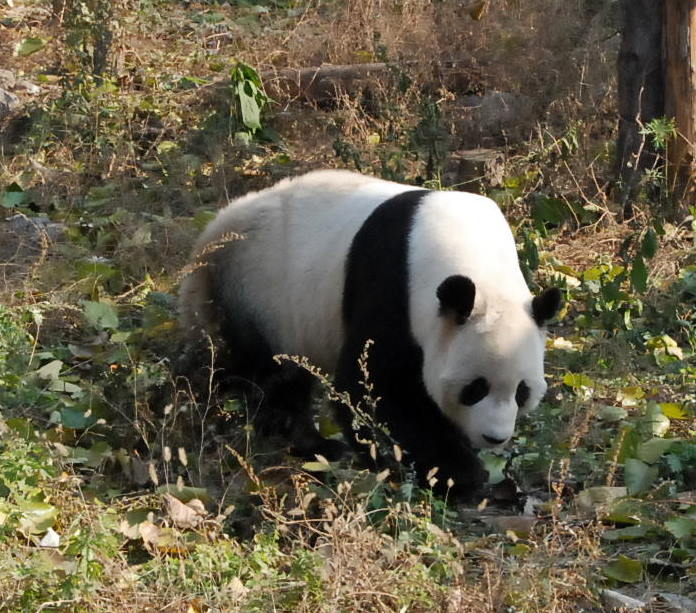

In [1]:
from __future__ import print_function
from IPython import display
!git clone https://github.com/tensorflow/tpu
display.clear_output()

# setup path
import sys
sys.path.append('/content/tpu/models/official/mnasnet')
sys.path.append('/content/tpu/models/common')

model_name = 'mixnet-s' #@param

!wget https://upload.wikimedia.org/wikipedia/commons/f/fe/Giant_Panda_in_Beijing_Zoo_1.JPG -O panda.jpg
image_file = 'panda.jpg'
display.display(display.Image(image_file))

In [2]:
import  eval_ckpt_main as eval_ckpt
import tensorflow.compat.v1 as tf

tf.logging.set_verbosity(tf.logging.ERROR)

!wget https://storage.googleapis.com/cloud-tpu-checkpoints/mixnet/{model_name}.tar.gz -O {model_name}.tar.gz
!tar zxf {model_name}.tar.gz
ckpt_dir = model_name
!wget https://storage.googleapis.com/cloud-tpu-checkpoints/efficientnet/eval_data/labels_map.txt -O labels_map.txt
labels_map_file = 'labels_map.txt'


image_files = [image_file]
eval_driver = eval_ckpt.get_eval_driver(model_name)
pred_idx, pred_prob = eval_driver.eval_example_images(
    ckpt_dir, image_files, labels_map_file)

W0723 00:54:20.862107 139888366741376 deprecation_wrapper.py:119] From tpu/models/official/efficientnet/utils.py:88: The name tf.layers.BatchNormalization is deprecated. Please use tf.compat.v1.layers.BatchNormalization instead.

W0723 00:54:20.863890 139888366741376 deprecation_wrapper.py:119] From tpu/models/official/efficientnet/utils.py:211: The name tf.layers.Layer is deprecated. Please use tf.compat.v1.layers.Layer instead.



--2019-07-23 00:54:21--  https://storage.googleapis.com/cloud-tpu-checkpoints/mixnet/mixnet-s.tar.gz
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.197.128, 2607:f8b0:400e:c08::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.197.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30633801 (29M) [application/gzip]
Saving to: ‘mixnet-s.tar.gz’

mixnet-s.tar.gz     100%[===================>]  29.21M   177MB/s    in 0.2s    

2019-07-23 00:54:22 (177 MB/s) - ‘mixnet-s.tar.gz’ saved [30633801/30633801]

--2019-07-23 00:54:24--  https://storage.googleapis.com/cloud-tpu-checkpoints/efficientnet/eval_data/labels_map.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 2607:f8b0:400e:c07::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 31565 (31K) [text/plain]
Saving to: ‘labels_map.txt’

labe